<a href="https://colab.research.google.com/github/julianafalves/Sinais-Digitais/blob/main/Projeto2_Exemplo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit_dsp_comm

     |████████████████████████████████| 90 kB 4.3 MB/s 


In [3]:
import sk_dsp_comm.sigsys as ss
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *

In [4]:
pylab.rcParams['savefig.dpi'] = 100 # default 72
pylab.rcParams['figure.figsize'] = (6.0, 4.0) # default (6,4)
%config InlineBackend.figure_formats=['png'] # default for inline viewing
#config InlineBackend.figure_formats=['svg'] # SVG inline viewing
#%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX

In [47]:
def nextpow2(x):
    return 1 if x == 0 else (x - 1).bit_length()

# Exemplo 2: Aliasing no domínio do tempo

Este próximo exemplo, tem como objetivo verificar o aliasing no domínio do tempo realizando a convolução FFT com preenchimento de zeros insuficiente. Para a realização desse exemplo foi definido:
* Filtro com L = 65 amostras;
* Tamanho do sinal M = 100, com impulso no tempo 10 e M - (L-1)/4 = 85
* Para evitar aliasing no domínio do tempo devemos utilizar uma FFT com tamanho de pelo menos 85 + 65 - 1 = 149. Assim foi realizado 3 seguintes casos de estudo:  
    1.   Aliasing no tempo forte utilizando uma FFT de tamanho 116
    2.   Aliasing no tempo leve utilizando uma FFT de tamanho 132
    3.   Sem aliasing no tempo utilizando uma FFT de tamanho 165


 


In [49]:
# Tamanho do sinal
tam_sinal = 100
tam_filtro = 65

# Criando a variável contador [n]
n = np.arange(0, tam_sinal)
# Definindo impulsos no tempo 10 e 85
x = ss.dimpulse(n-10) + ss.dimpulse(n-(tam_sinal-(tam_filtro-1)/4))

Podemos visualizar sinal de entrada $x[n]$ por meio do método `stem`:

Text(0.5, 0, 'n')

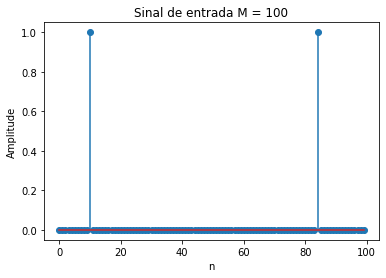

In [50]:
plt.stem(x, use_line_collection=True)
plt.title("Sinal de entrada M = 100")
plt.ylabel("Amplitude")
plt.xlabel("n")

In [51]:
# Frequência de corte
freq_corte = 100
taxa_amostragem = 1000

# Filtro pelo método da janela 
hsupp = np.arange(-(tam_filtro - 1) / 2, 1 + (tam_filtro - 1) / 2)
hideal = (2.0 * freq_corte / taxa_amostragem) * np.sinc(2.0 * freq_corte * hsupp / taxa_amostragem)

# Aplicar o hamming para suavizar os "cantos" do filtro
h = np.hamming(tam_filtro) * hideal

Text(0.5, 0, 'n')

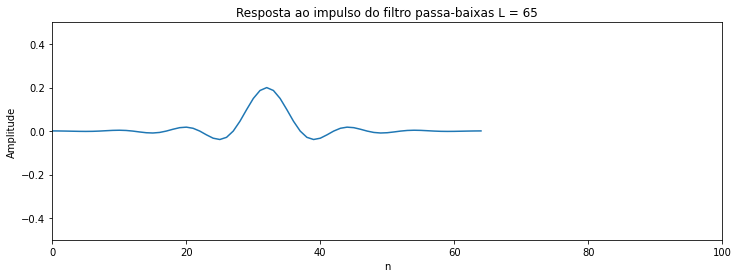

In [52]:
plt.figure(figsize=(12,4))
plt.plot(h)
plt.ylim((-0.5, 0.5))
plt.xlim((0, 100))
plt.title("Resposta ao impulso do filtro passa-baixas L = 65")
plt.ylabel("Amplitude")
plt.xlabel("n")

Primeiramente foi realizado a convolução com aliasing forte no tempo

Text(0.5, 0, 'Tempo')

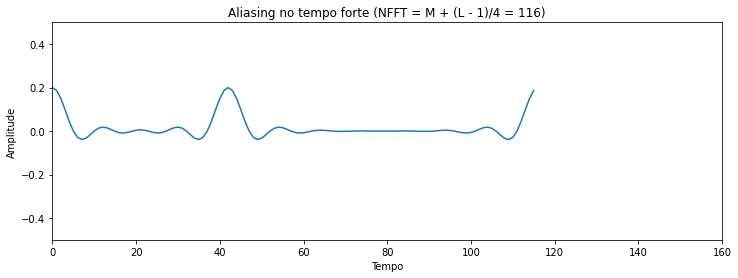

In [53]:
# Definindo tamanho N da fft com valor de M + (L - 1)/4 = 116
Nfft = tam_sinal + (tam_filtro-1)/4

# Preenchendo com 0 o final da entrada e da resposta
xzp = np.pad(x, (0, int(Nfft-tam_sinal)))
hzp = np.pad(h, (0, int(Nfft-tam_filtro)))

# FFT de cada sinal
X = fftpack.fft(xzp)
H = fftpack.fft(hzp)

Y = X * H
y = np.real(fftpack.ifft(Y))

plt.figure(figsize=(12,4))
plt.plot(np.real(y))
plt.ylim((-0.5, 0.5))
plt.xlim((0, 160))
plt.title("Aliasing no tempo forte (NFFT = M + (L - 1)/4 = 116)")
plt.ylabel("Amplitude")
plt.xlabel("Tempo")

Em sequência, foi realizado a convolução com aliasing leve no tempo


Text(0.5, 0, 'Tempo')

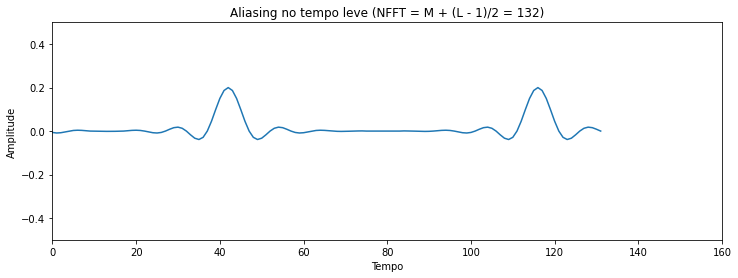

In [54]:
# Definindo tamanho N da fft com valor de M + (L - 1)/2 = 132
Nfft = tam_sinal + (tam_filtro-1)/2

# Preenchendo com 0 o final da entrada e da resposta
xzp = np.pad(x, (0, int(Nfft-tam_sinal)))
hzp = np.pad(h, (0, int(Nfft-tam_filtro)))

# FFT de cada sinal
X = fftpack.fft(xzp)
H = fftpack.fft(hzp)
Y = X * H
y = np.real(fftpack.ifft(Y))

plt.figure(figsize=(12,4))
plt.plot(np.real(y))
plt.ylim((-0.5, 0.5))
plt.xlim((0, 160))
plt.title("Aliasing no tempo leve (NFFT = M + (L - 1)/2 = 132)")
plt.ylabel("Amplitude")
plt.xlabel("Tempo")

E por fim o resultado sem aliasing no tempo

Text(0.5, 0, 'Tempo')

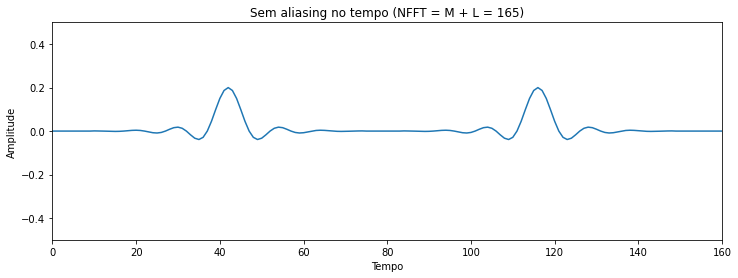

In [44]:
# Definindo tamanho N da fft com valor de M + L = 165
Nfft = tam_sinal + tam_filtro

# Preenchendo com 0 o final da entrada e da resposta
xzp = np.pad(x, (0, int(Nfft-tam_sinal)))
hzp = np.pad(h, (0, int(Nfft-tam_filtro)))

# FFT de cada sinal
X = fftpack.fft(xzp)
H = fftpack.fft(hzp)
Y = X * H
y = np.real(fftpack.ifft(Y))

plt.figure(figsize=(12,4))
plt.plot(np.real(y))
plt.ylim((-0.5, 0.5))
plt.xlim((0, 160))
plt.title("Sem aliasing no tempo (NFFT = M + L = 165)")
plt.ylabel("Amplitude")
plt.xlabel("Tempo")